In [131]:
import pandas as pd
import numpy as np
import wfdb
import ast

import matplotlib.pyplot as plt

# Funktion aus Physionet-Database
def load_raw_data(df, sampling_rate, path):
    # Loading all data with signal and meta information
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    
    # Eliminating meta information. We are selecting only signal value of 12 leads 
    data = np.array([signal for signal, meta in data])
    return data

1. Schritt: Importieren aller Dateien aus https://physionet.org/content/ptb-xl-plus/1.0.1/#files und https://physionet.org/content/ptb-xl/1.0.3/

In [132]:
base_path = r"D:\SynologyDrive\10_Arbeit_und_Bildung\20_Masterstudium\01_Semester\90_Projekt\10_DEV"
path = base_path + "/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/"

print(path)

Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

D:\SynologyDrive\10_Arbeit_und_Bildung\20_Masterstudium\01_Semester\90_Projekt\10_DEV/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/


In [133]:
# Select Patient ID
selected_ecg_id = 10

Y_sorted_by_patient_id = Y.sort_values(by="ecg_id")

Y_selected = Y_sorted_by_patient_id[selected_ecg_id-1:selected_ecg_id]
X_selected = load_raw_data(Y_selected, 500, path)

In [134]:
label_uni_g = pd.read_csv(r"D:\SynologyDrive\10_Arbeit_und_Bildung\20_Masterstudium\01_Semester\90_Projekt\10_DEV\ptb-xl-a-comprehensive-electrocardiographic-feature-dataset-1.0.1\features\ecgdeli_features.csv")
label_uni_g_sorted = label_uni_g.sort_values(by="ecg_id")

label_uni_g_selected = label_uni_g_sorted[selected_ecg_id-1:selected_ecg_id]

features = label_uni_g_selected["P_Amp_I"]

9    0.02
Name: P_Amp_I, dtype: float64
Puls in BPM:  9    0.0012
Name: P_Amp_I, dtype: float64


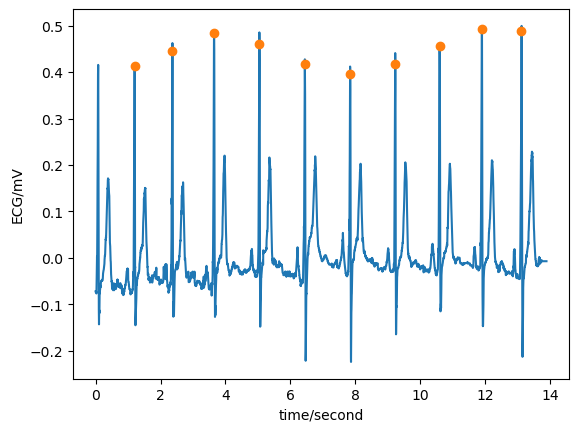

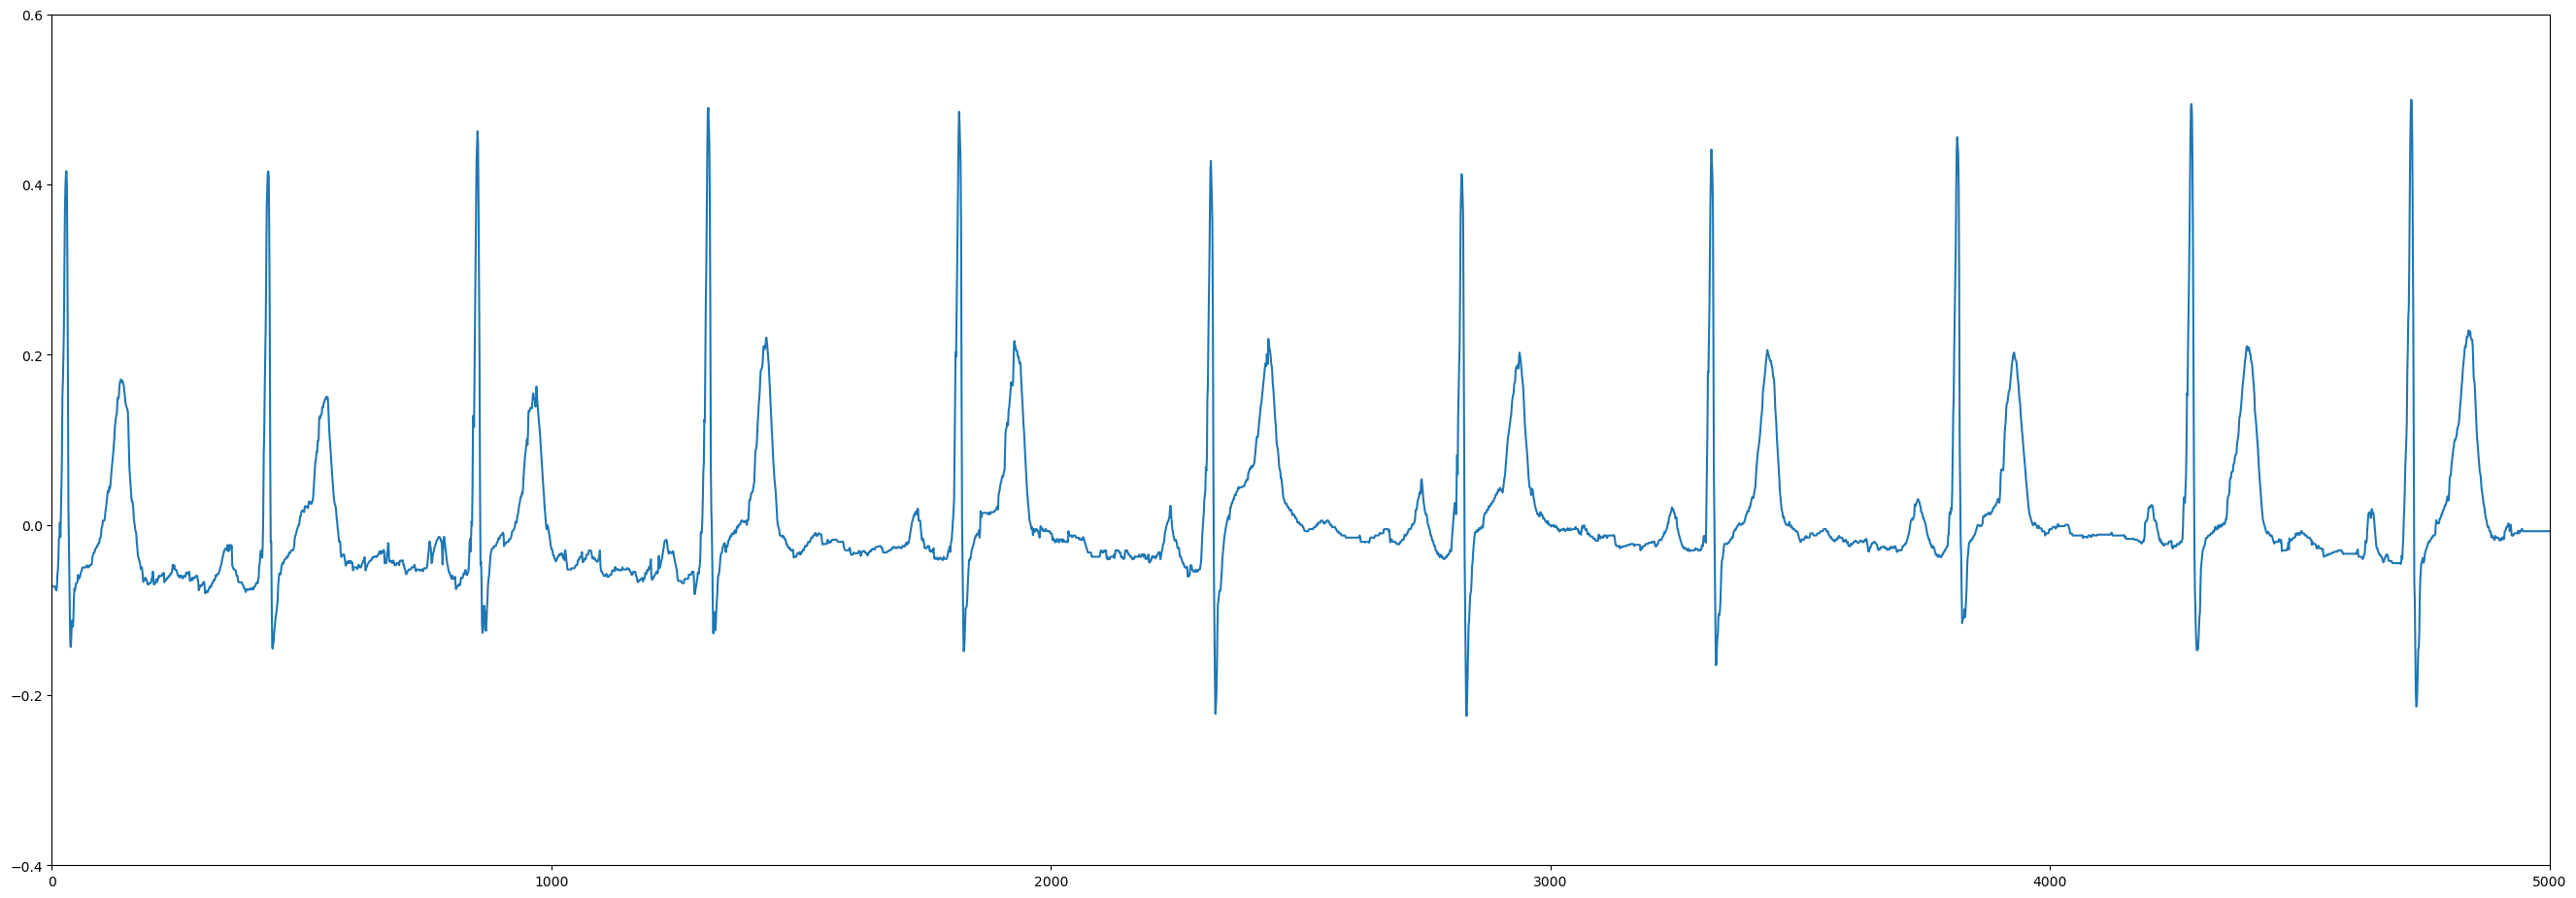

In [ ]:
import matplotlib.figure
import wfdb.processing
import wfdb.processing.evaluate
import wfdb.processing.qrs

features = label_uni_g_selected["P_Amp_I"]
print(features)
print("Puls in BPM: ", features / 1000 * 60)



leads = X_selected[0]
# lead_0 = leads[:,0]



# Calculate the median lead of 12-lead-ecg
median_lead = np.transpose(np.median(np.transpose(leads), axis=0))

rpeaks = wfdb.processing.xqrs_detect(median_lead, fs=500, verbose=False)
fig = wfdb.plot_items(
    median_lead,
    [rpeaks],
    fs=360,
    sig_name=["ECG"],
    sig_units=["mV"],
    time_units="seconds",
    return_fig=True,
    ann_style="o",
)

# Plot graphic
fig, ax = plt.subplots()
ax.plot(median_lead)
ax.set(ylim=(-0.4, 0.6), xlim=(0,5000))
fig.tight_layout()
fig.set_figwidth(30)
fig.set_figheight(10)

ax.plot([features.iloc[0], features.iloc[0]],[-1,1],marker = 'o')

plt.show()